In [ ]:
# @title Importing necessary libraries
 # Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


In [ ]:
# @title Importing necessary libraries
# Load the Titanic dataset
df = pd.read_csv('/content/tested.csv')

# Display the first few rows of the dataset
df.head()

# Display basic information about the dataset
df.info()

# Statistical summary of the dataset
df.describe()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


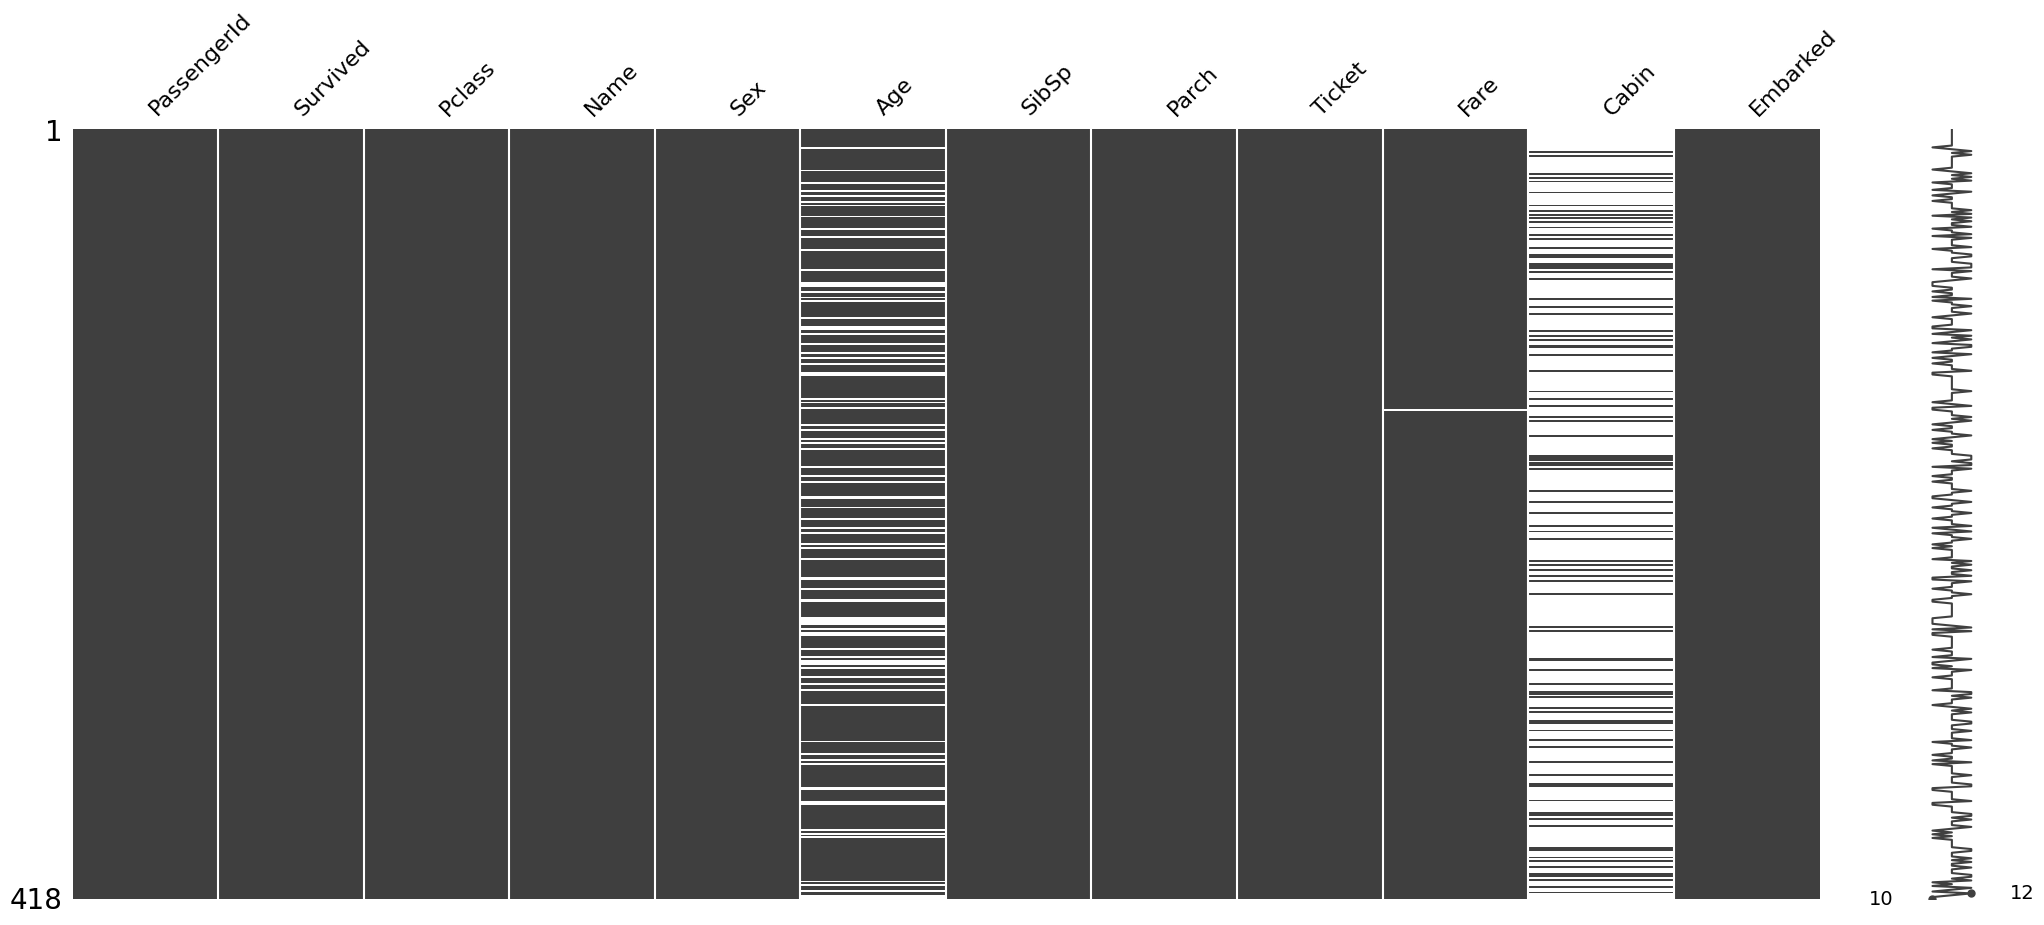

In [ ]:
msno.matrix(df)
plt.show()

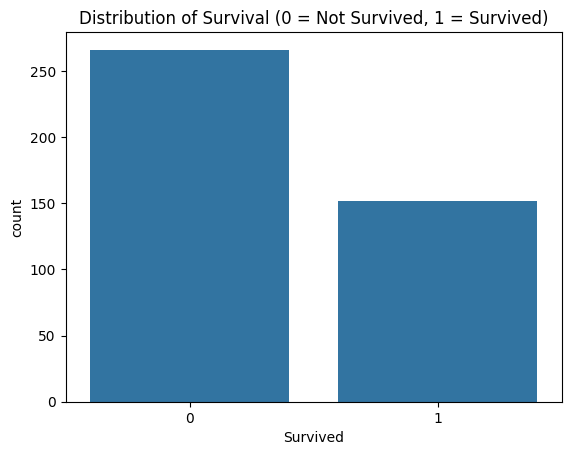

In [ ]:
# @title Univariate Analysis
# Distribution of 'Survived'
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survival (0 = Not Survived, 1 = Survived)')
plt.show()

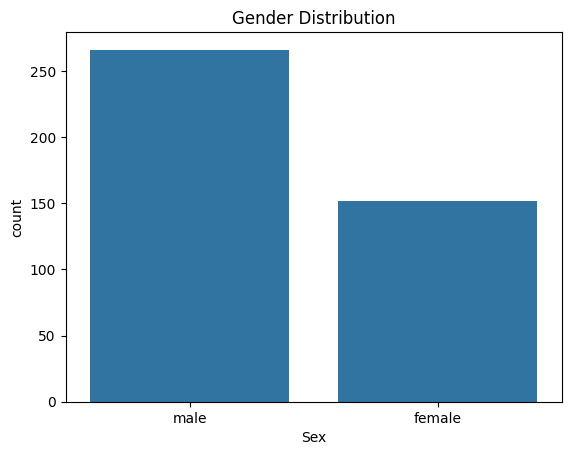

In [ ]:
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()

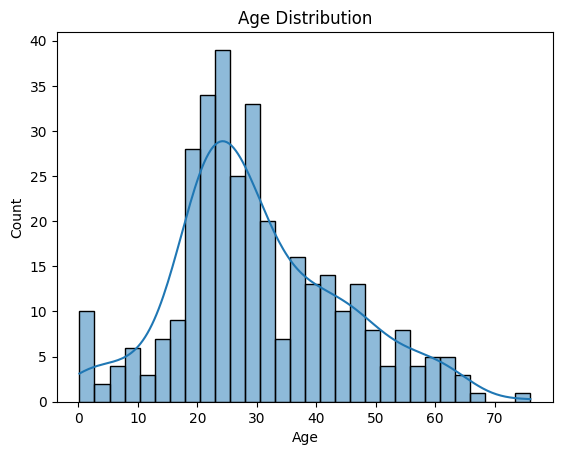

In [ ]:
# @title Distribution of 'Age'
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

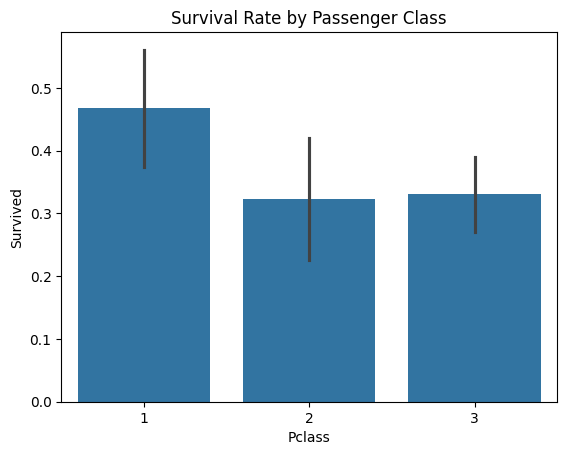

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()


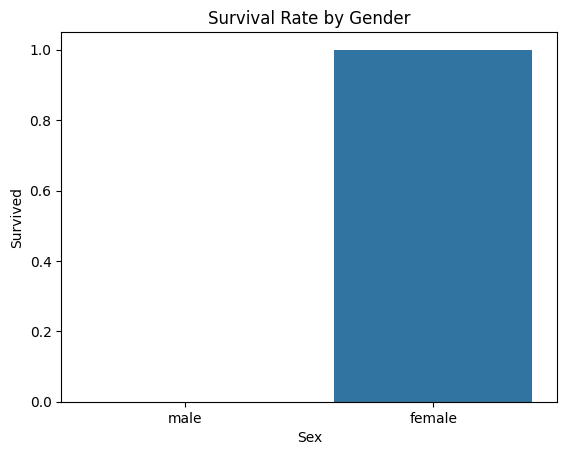

In [ ]:
# @title Survival rate by 'Sex'
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

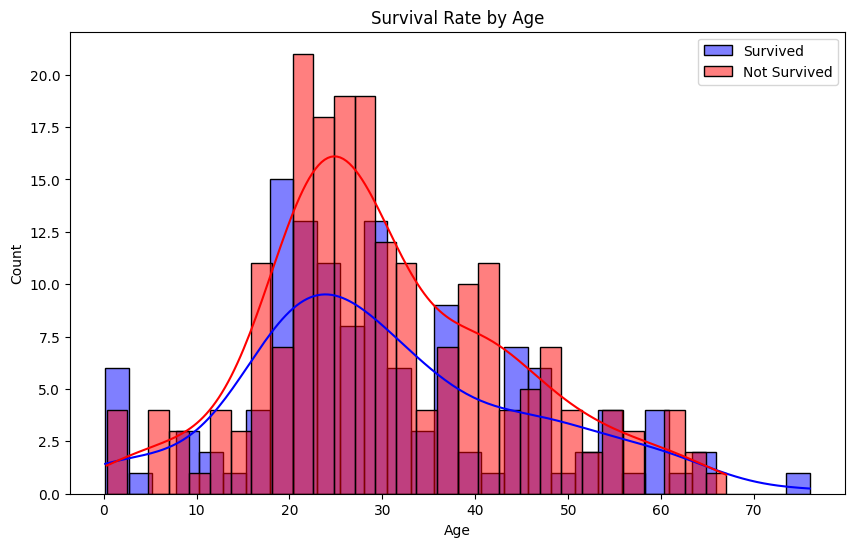

In [ ]:
# @title Survival rate by 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived'] == 1]['Age'].dropna(), color='blue', bins=30, kde=True, label='Survived')
sns.histplot(df[df['Survived'] == 0]['Age'].dropna(), color='red', bins=30, kde=True, label='Not Survived')
plt.title('Survival Rate by Age')
plt.legend()
plt.show()

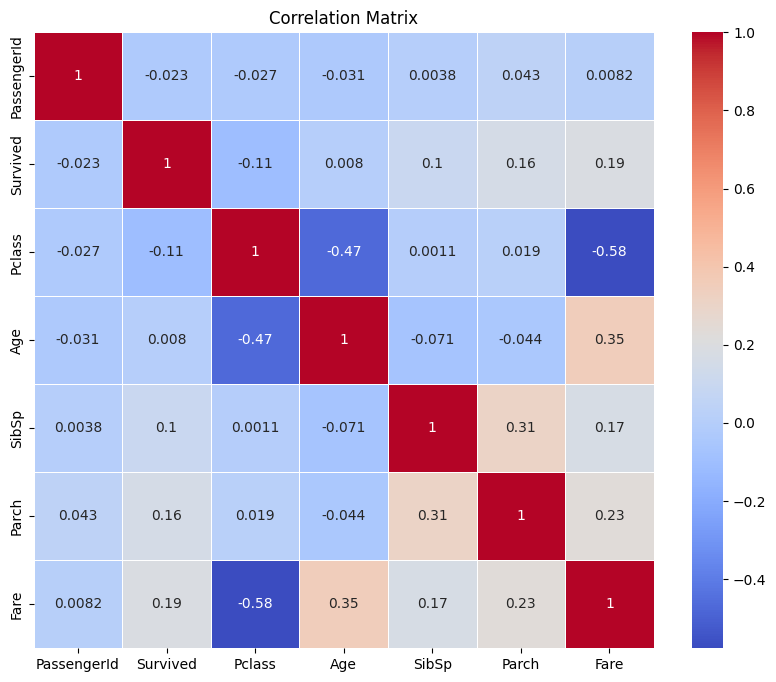

In [ ]:
# @title Correlation matrix
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# @title Handling Missing Values
# Fill missing 'Age' with median age
df['Age'].fillna(df['Age'].median(), inplace=True)

In [ ]:
# @title Fill missing 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column due to too many missing values
df.drop(columns='Cabin', inplace=True)

# Check again for missing values
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
# @title Feature Engineering
# Create 'FamilySize' feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create 'IsAlone' feature
df['IsAlone'] = np.where(df['FamilySize'] > 1, 0, 1)

# Drop unnecessary columns
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

# Final Dataframe head
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,male,34.5,0,0,7.8292,Q,1,1
1,1,3,female,47.0,1,0,7.0000,S,2,0
2,0,2,male,62.0,0,0,9.6875,Q,1,1
3,0,3,male,27.0,0,0,8.6625,S,1,1
4,1,3,female,22.0,1,1,12.2875,S,3,0
